In [3]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [4]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, '타깃')

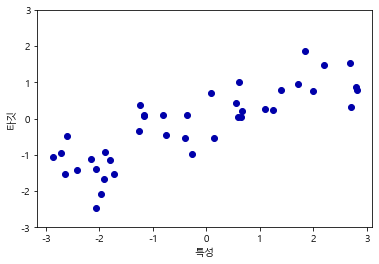

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

#wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
#훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [14]:
print("테스트 세트 R^2: {: .2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2:  0.83


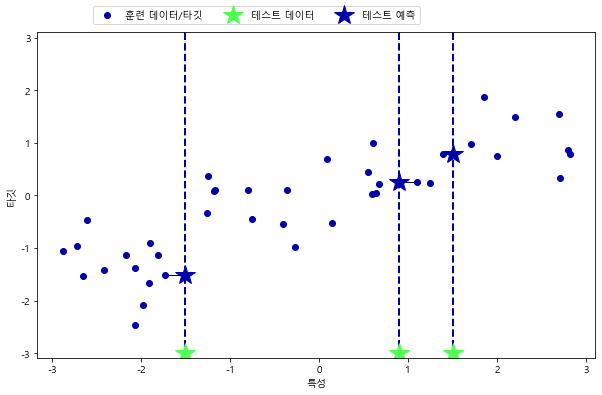

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

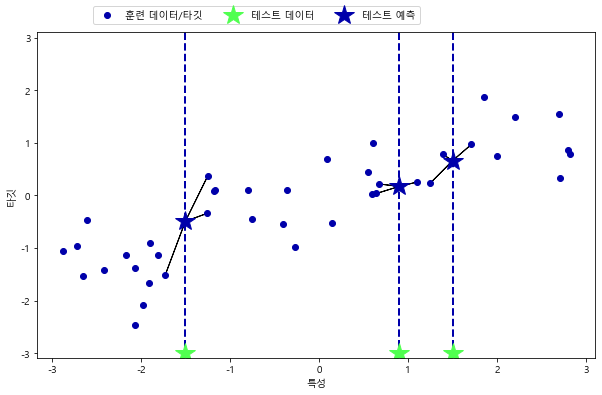

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

#이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
#훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [18]:
print("테스트 세트 에측:\n{}".format(reg.predict(X_test)))

테스트 세트 에측:
[-0.054  0.43   0.826 -1.894 -1.042 -1.631  0.169  0.912 -0.446 -1.042
 -0.493  0.826 -1.042  0.413 -0.446  0.43 ]


In [19]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.68


X_train.shape: (24, 1) X_test.shape:(16, 1)
X_train.shape: (24, 1) X_test.shape:(16, 1)
X_train.shape: (24, 1) X_test.shape:(16, 1)


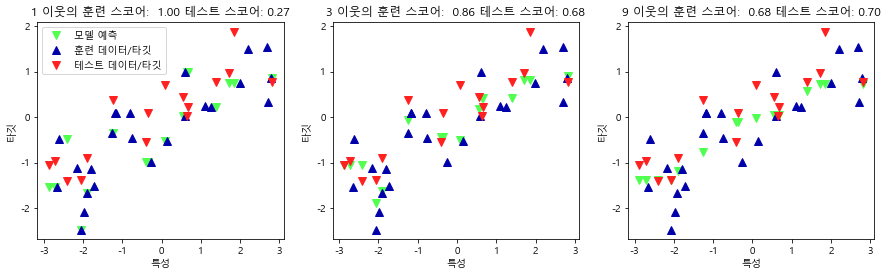

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
    reg.fit(X_train, y_train)
    ax.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {: .2f} 테스트 스코어: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

In [22]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [25]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [28]:
from sklearn.datasets import load_boston
boston = load_boston()

print("boston.keys(): {}\n". format(boston.keys()))
print("Data의 크기: {}\n".format(boston['data'].shape))
print("특성 이름:\n{}\n".format(boston.feature_names))
print(boston['DESCR'] + "\n...")

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Data의 크기: (506, 13)

특성 이름:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS 

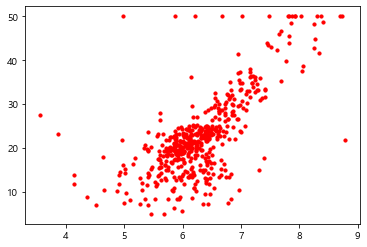

In [29]:
import matplotlib.pyplot as plt
plt.scatter(boston.data[:, 5], boston.target, color='r', s=10)

In [32]:
#속성 하나로 선형회귀 실험

X = boston.data[:, 5]

print(X.shape)

#LinearRegression의 함수에 인자로 전달하기 위해서는
# 각 원소의 값이 담긴 2차원 배열을 (n, 1)의 형태로 만들어야 함
# atleast_2d 함수는 x 데이터를 2차원 배열을 (1, n) 형태로 만들어 준다.

X_1 = np.atleast_2d(X)
X_2 = np.transpose(X_1)
print(X_2.shape)
y = boston.target

lr.fit(X_2, y)

y_predicted = lr.predict(X_2)

print("w[0]: %f b: %f" % (lr.coef_[0], lr.intercept_))

(506,)
(506, 1)
w[0]: 9.102109 b: -34.670621


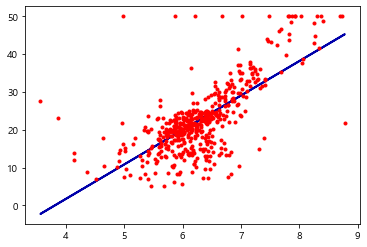

In [33]:
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='r', markersize=3)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.shape: (379, 13) X_test.shape:(127, 13)
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
lr = KNeighborsRegressor().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.shape: (379, 13) X_test.shape:(127, 13)
훈련 세트 점수: 0.71
테스트 세트 점수: 0.46


In [38]:
X, y = mglearn.datasets.load_extended_boston()

print("X,shape: {}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X train.shape:{}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)

X,shape: (506, 104)
X train.shape:(379, 104) X_test.shape:(127, 104)


In [39]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [40]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(knn.score(X_test, y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수:0.61


In [41]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수:0.89
테스트 세트 점수: 0.75


In [42]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수:0.95
테스트 세트 점수: 0.61


In [44]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

훈련 세트 점수:0.90
테스트 세트 점수: 0.61


In [55]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


In [46]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}". format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}". format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ !=0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [47]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}". format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}". format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ !=0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [48]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}". format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}". format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ !=0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


In [49]:
print("계수값:\n", lasso.coef_)
print(np.where(lasso.coef_ !=0))

계수값:
 [-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.    -0.
 -0.     0.    -5.353 -0.     0.    -0.     0.    -0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.     0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.     0.
  0.    -0.    -0.    -0.     0.    -0.    -0.     0.    -0.    -1.051
 -3.31  -0.    -0.     0.    -0.    -0.    -0.     0.    -0.    -0.414
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
 -0.     0.    -0.    -0.   ]
(array([12, 79, 80, 89], dtype=int64),)


Text(0, 0.5, '계수 크기')

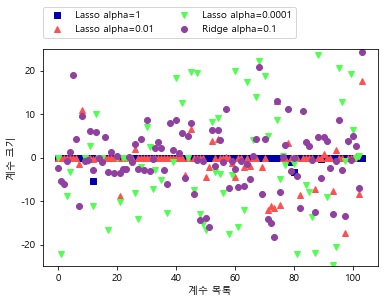

In [56]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [63]:
iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름: {}".format(iris['target_names']))
print("특성의 이름: {}".format(iris['feature_names']))
X = iris["data"][:,3:]  
print(X.shape)
y = (iris["target"]==2).astype(np.int)  
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


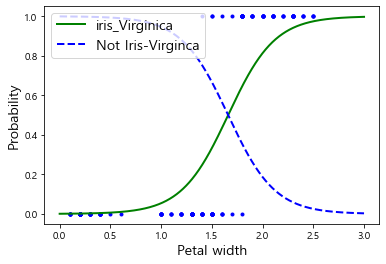

In [65]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

#꽃잎의 너비가 0-3cm인 꽃에 대해 모델의 추정확률

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="iris_Virginica")
plt.plot(X_new,y_proba[:,0],"b--", label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


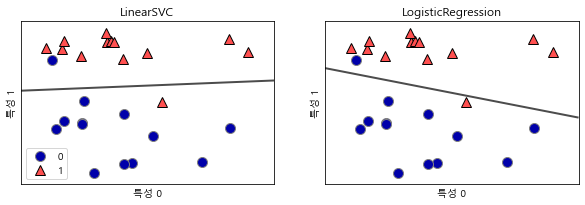

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

In [74]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [78]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [79]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


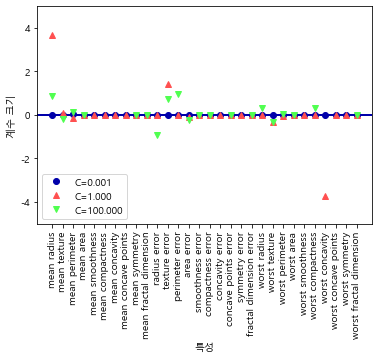

In [82]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    xlims = plt.xlim()
    plt.hlines(0, xlims[0], xlims[1])
    plt.xlim(xlims)
    plt.xlabel("특성")
    plt.ylabel("계수 크기")
    
    plt.ylim(-5, 5)
    plt.legend(loc=3)

저번주 까지는 강의 를 들으면서 어느정도 이해가 되었지만 이번 주의 강의를 들으면서 조금더 어떤 식으로 해야하는 지에 대해서 이해가 될 수 있었다.